In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [47]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train[0].shape

(28, 28)

In [5]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [8]:
def plotsample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

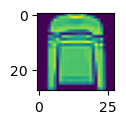

In [9]:
plotsample(5)

In [10]:
y_train[5]

2

In [11]:
labels = ['T-shirt/Top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [12]:
labels[y_train[5]]

'Pullover'

In [14]:
#x_train_scaled[0]

In [15]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

In [16]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [17]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
32*28*28

25088

In [25]:
from sklearn.utils import shuffle

x_train_flattened, y_train_categorical = shuffle(x_train_flattened, y_train_categorical)


In [26]:
print(np.any(np.isnan(x_train_flattened)))
print(np.any(np.isnan(y_train_categorical)))


False
False


In [29]:
print(x_train_flattened.shape)
print(y_train_categorical.shape)


(60000, 784)
(60000, 10)


In [30]:
model = keras.Sequential([
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
model.fit(x_train_flattened, y_train_categorical, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 9s 4ms/step - loss: 0.6813 - accuracy: 0.7779
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4708 - accuracy: 0.8365
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4288 - accuracy: 0.8513
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4003 - accuracy: 0.8609
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3796 - accuracy: 0.8664
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3652 - accuracy: 0.8710
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3521 - accuracy: 0.8749
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3397 - accuracy: 0.8798
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3283 - accuracy: 0.8828
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3

In [41]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_test[index])

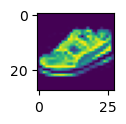

In [54]:
plot_sample(9552)

In [55]:
labels[np.argmax(model.predict(x_test_flattened)[9552])]

313/313 [==============================] - 1s 3ms/step


'Sandal'

In [46]:
def get_model():
    model = keras.Sequential([
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')])

    model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
    return model

In [51]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_flattened, y_train_categorical, epochs=1)

1875/1875 [==============================] - 9s 4ms/step - loss: 0.6838 - accuracy: 0.7763
9.49 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
